<a href="https://colab.research.google.com/github/SANKARM18/computer-vision/blob/main/unit4-photometric%20stereo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Loaded 4 images for photometric stereo.


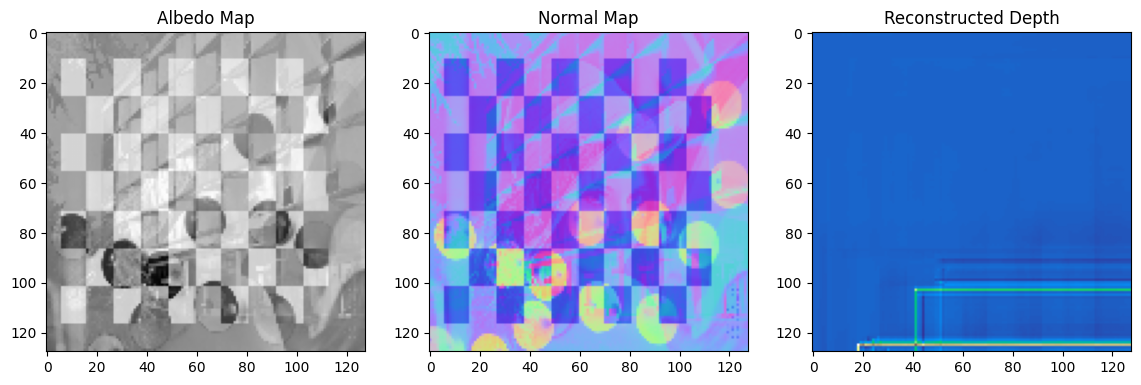

In [ ]:
# 📦 Step 1: Import Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

# Display settings
plt.rcParams['figure.figsize'] = [6, 6]

# 📁 Step 2: Download Example Photometric Stereo Dataset (Yale Face Subset)
# Simple dataset with 4 images of the same object under different lights
urls = [
    "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/smarties.png",
    "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg",
    "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/building.jpg",
    "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/chessboard.png"
]

images = []
for i, url in enumerate(urls):
    path = f"image_{i}.png"
    urlretrieve(url, path)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128)) / 255.0
    images.append(img)

print("✅ Loaded", len(images), "images for photometric stereo.")

# 📍 Step 3: Define Light Directions (example directions)
L = np.array([
    [0, 0, 1],     # front light
    [0, 1, 1],     # top light
    [1, 0, 1],     # side light
    [1, 1, 1]      # diagonal light
], dtype=float)
L = L / np.linalg.norm(L, axis=1)[:, None]  # normalize

# 📊 Step 4: Compute Surface Normals and Albedo
h, w = images[0].shape
I = np.stack(images, axis=-1).reshape(-1, len(images))  # (pixels × lights)

# Solve least squares: I = L * (albedo * normal)
G, _, _, _ = np.linalg.lstsq(L, I.T, rcond=None)
G = G.T.reshape(h, w, 3)

# Albedo (reflectance strength)
albedo = np.linalg.norm(G, axis=2)

# Normal map
normals = G / (albedo[..., None] + 1e-8)

# 📈 Step 5: Depth Reconstruction (simple integration)
dzdx = -normals[:, :, 0] / (normals[:, :, 2] + 1e-8)
dzdy = -normals[:, :, 1] / (normals[:, :, 2] + 1e-8)
depth = np.cumsum(dzdx, axis=1) + np.cumsum(dzdy, axis=0)

# 📷 Step 6: Visualization
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.imshow(albedo, cmap='gray')
plt.title("Albedo Map")

plt.subplot(1, 3, 2)
plt.imshow((normals + 1) / 2)
plt.title("Normal Map")

plt.subplot(1, 3, 3)
plt.imshow(depth, cmap='terrain')
plt.title("Reconstructed Depth")
plt.show()
